# A First Application

In [1]:
# the data can be loaded from scikit-learn
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [3]:
# Splitting data training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [4]:
#check
print("X_train Shape: {}".format(X_train.shape))
print("y_train Shape: {}".format(y_train.shape))

X_train Shape: (112, 4)
y_train Shape: (112,)


In [5]:
print("X_test Shape: {}".format(X_test.shape))
print("y_test Shape: {}".format(y_test.shape))

X_test Shape: (38, 4)
y_test Shape: (38,)


### Checking the Data Set

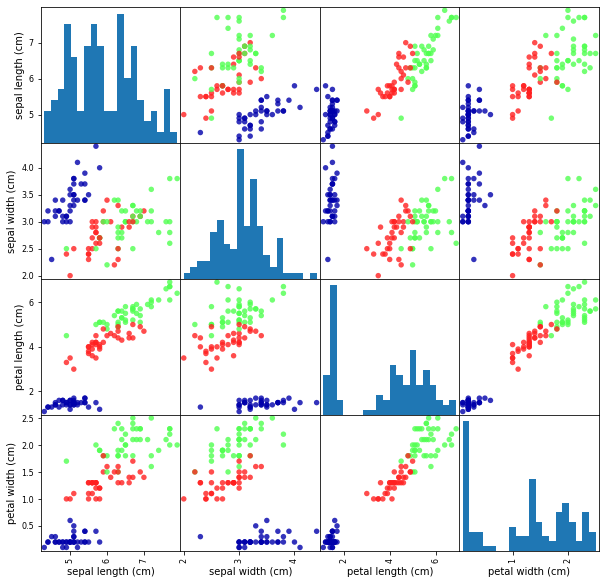

In [13]:
import pandas as pd

#Also import mglearn, which is created by the authors of this book
import mglearn

# Create dataframe from data in X_train
# columns are labelled using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
#note that unlike in the book we have used pd.plotting
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(10,10), marker='o', hist_kwds={'bins':20},s=30,alpha=0.8,cmap=mglearn.cm3)

### Using k-Nearest Neighbors

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [15]:
# Building the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Making Predictions

In [18]:
import numpy as np
X_new = np.array([[5,2.9,1,0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [19]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted Target name: {}".format(iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted Target name: ['setosa']


### Evaluating the Model

In [20]:
y_pred = knn.predict(X_test)
print("Test set predictions: \n{}".format(y_pred))

Test set predictions: 
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [22]:
#checking the score
print("Test set score: {:.3f}".format(np.mean(y_pred == y_test)))

Test set score: 0.974


### Summarizing the codes

In [24]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
print("Test set score: {:.3f}".format(knn.score(X_test, y_test)))

Test set score: 0.974
